In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
pd_station['day_in_october']

14

In [279]:
name = ['19540101_20231101_Obergurgl', '19900101_20231101_Sonnblick', '19900101_20231101_PitztalerGletscher']
pd_station_last2w_oct_mean_d = {}
pd_station_last60d_oct_mean_d = {}
pd_station_last150d_oct_mean_d = {}
for n in name:
    pd_station = pd.read_csv(f'TAG Datensatz_{n}.csv')
    time_data = pd.DatetimeIndex(pd_station.time.values)
    pd_station['last_14_days_of_october'] = False
    pd_station['day_in_october'] = False
    pd_station['month'] = time_data.month.values
    pd_station['day_of_year'] =time_data.dayofyear.values
    pd_station['year'] = time_data.year.values
    
    #_sel_day_of_year = time_data[-14-1:-1] # last 14 days of October
    #print(_sel_day_of_year)
    # last 14 days
    sel_day_of_year = time_data[-14-1:-1].dayofyear
    assert len(sel_day_of_year.unique()) == 14
    for d in sel_day_of_year:
        condi = pd_station.day_of_year.values == d
        pd_station.loc[condi, 'last_14_days_of_october'] = True
    pd_station_last2w_oct = pd_station.where(pd_station.last_14_days_of_october).dropna(how='all')
    # check that we use the correct days!!!
    assert np.all(pd_station_last2w_oct.day_of_year.unique() == sel_day_of_year)
    # average over the years
    pd_station_last2w_oct_mean = pd_station_last2w_oct.groupby(['year','station']).mean().reset_index()        
    pd_station_last2w_oct_mean_d[n] = pd_station_last2w_oct_mean
    
    # last 60 days
    sel_day_of_year_60d = time_data[-60-1:-1].dayofyear
    assert len(sel_day_of_year_60d.unique()) == 60
    for d in sel_day_of_year_60d:
        condi = pd_station.day_of_year.values == d
        pd_station.loc[condi, 'last_60_days_of_october'] = True
    pd_station_last60d_oct = pd_station.where(pd_station.last_60_days_of_october).dropna(how='all')
    # check that we use the correct days!!!
    assert np.all(pd_station_last60d_oct.day_of_year.unique() == sel_day_of_year_60d)
    # average over the years
    pd_station_last60d_oct_mean = pd_station_last60d_oct.groupby(['year','station']).mean().reset_index()        
    pd_station_last60d_oct_mean_d[n] = pd_station_last60d_oct_mean    
        
    # last 150 days
    sel_day_of_year_150d = time_data[-150-1:-1].dayofyear
    assert len(sel_day_of_year_150d.unique()) == 150
    for d in sel_day_of_year_150d:
        condi = pd_station.day_of_year.values == d
        pd_station.loc[condi, 'last_150_days_of_october'] = True
    pd_station_last150d_oct = pd_station.where(pd_station.last_150_days_of_october).dropna(how='all')
    # check that we use the correct days!!!
    assert np.all(pd_station_last150d_oct.day_of_year.unique() == sel_day_of_year_150d)
    # average over the years
    pd_station_last150d_oct_mean = pd_station_last150d_oct.groupby(['year','station']).mean().reset_index()        
    pd_station_last150d_oct_mean_d[n] = pd_station_last150d_oct_mean 


In [290]:
name_d_sh = {'19540101_20231101_Obergurgl': 'Obergurgl', '19900101_20231101_Sonnblick':'Sonnblick',  '19900101_20231101_PitztalerGletscher': 'Pitztaler Gletscher'}

/tmp/ipykernel_49526/34710515.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_station_xx_oct_mean_st['t_roll'] = pd_station_xx_oct_mean_st.rolling(window=10, center=True).mean()['t']
/tmp/ipykernel_49526/34710515.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_station_xx_oct_mean_st['t_roll'] = pd_station_xx_oct_mean_st.rolling(window=10, center=True).mean()['t']
/tmp/ipykernel_49526/34710515.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

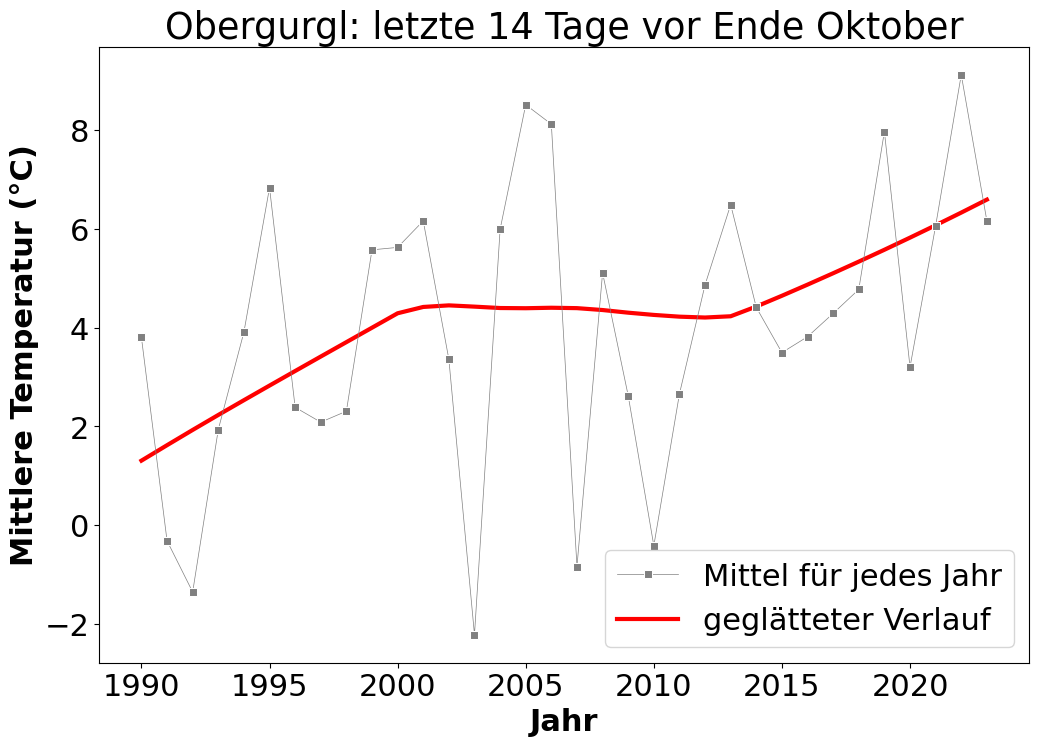

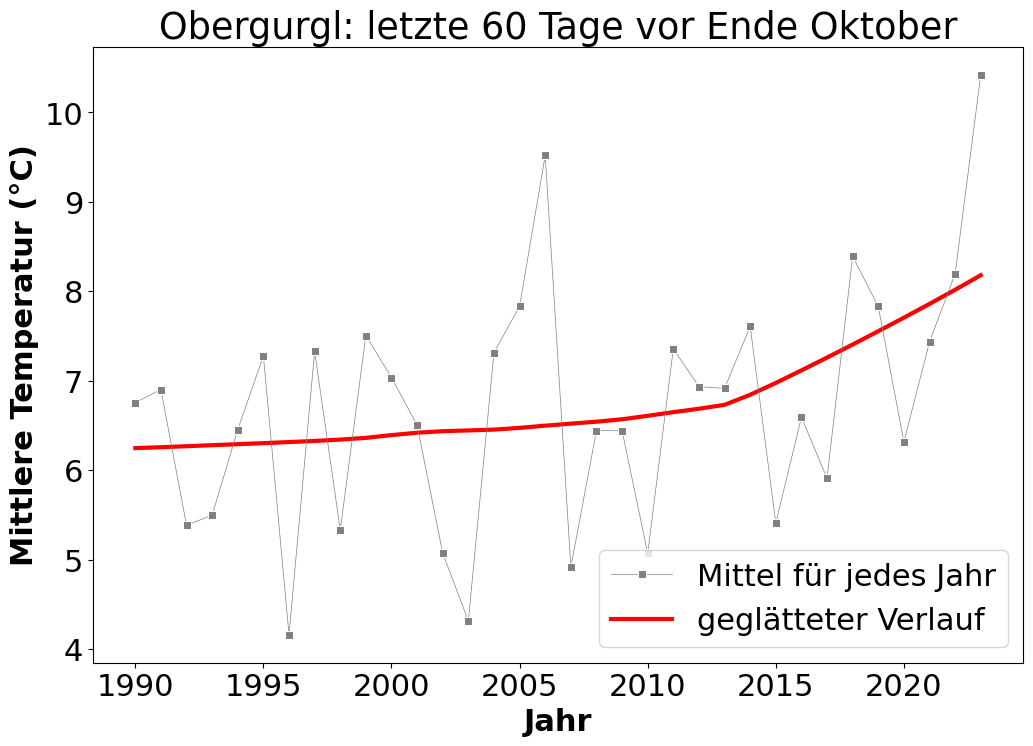

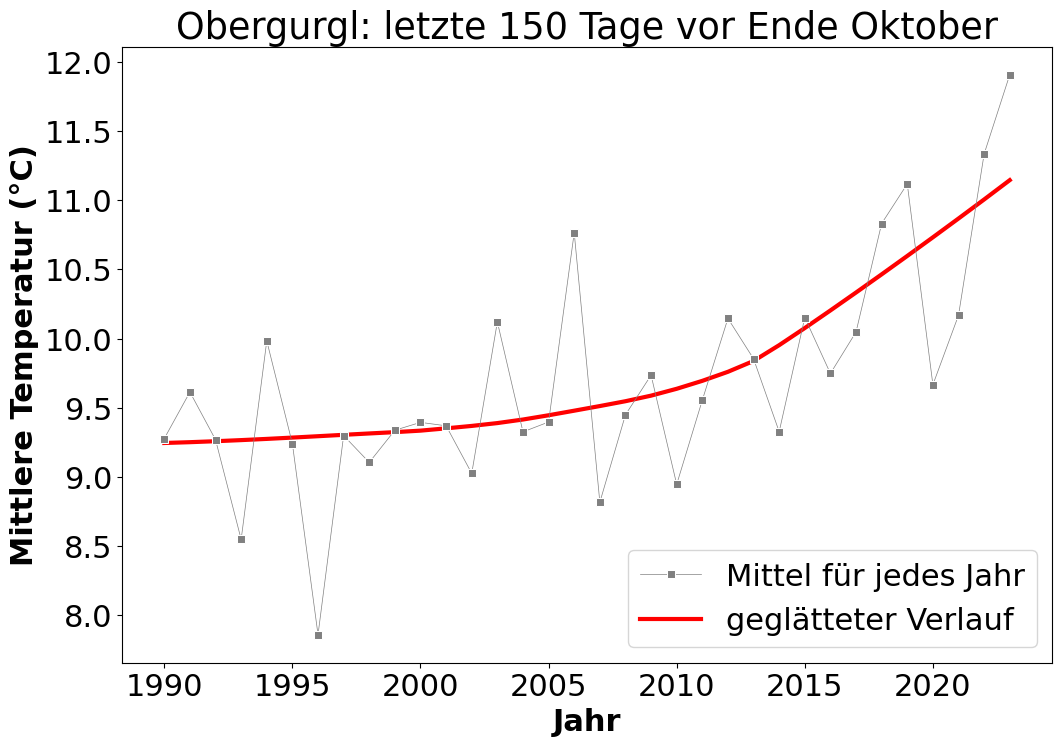

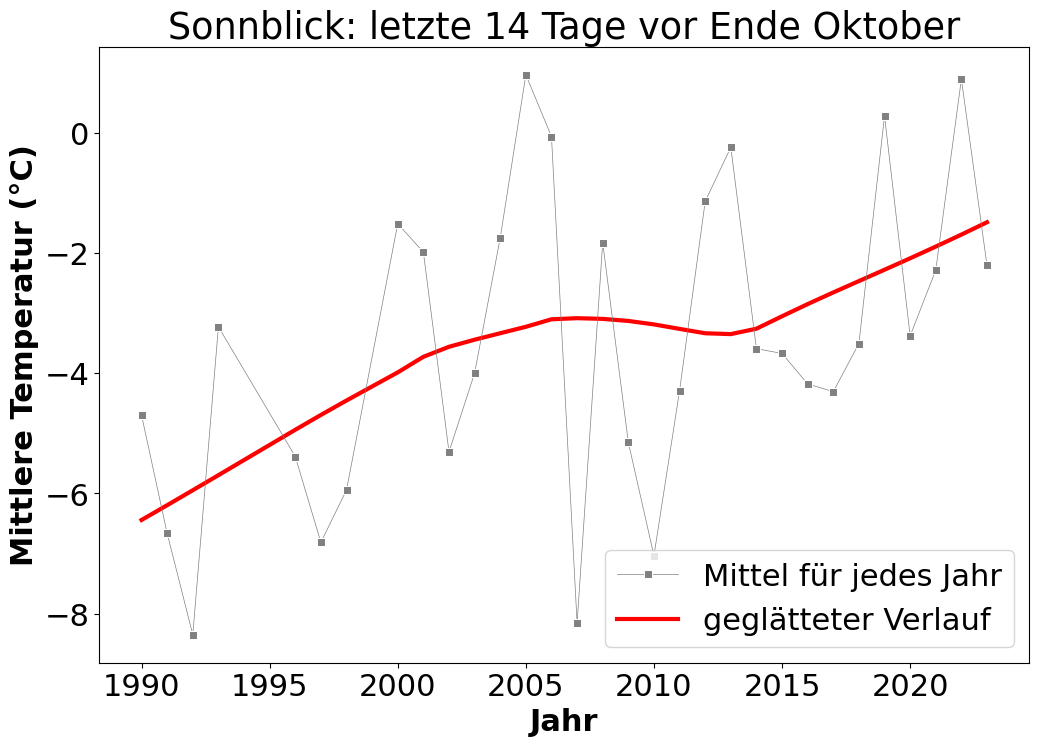

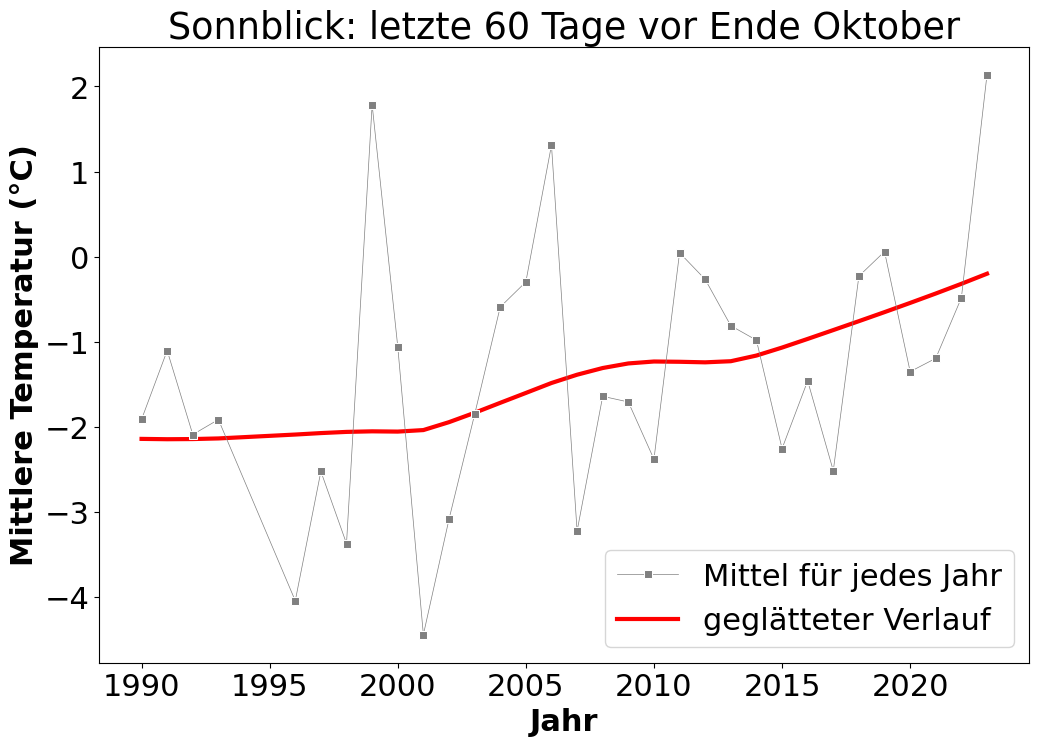

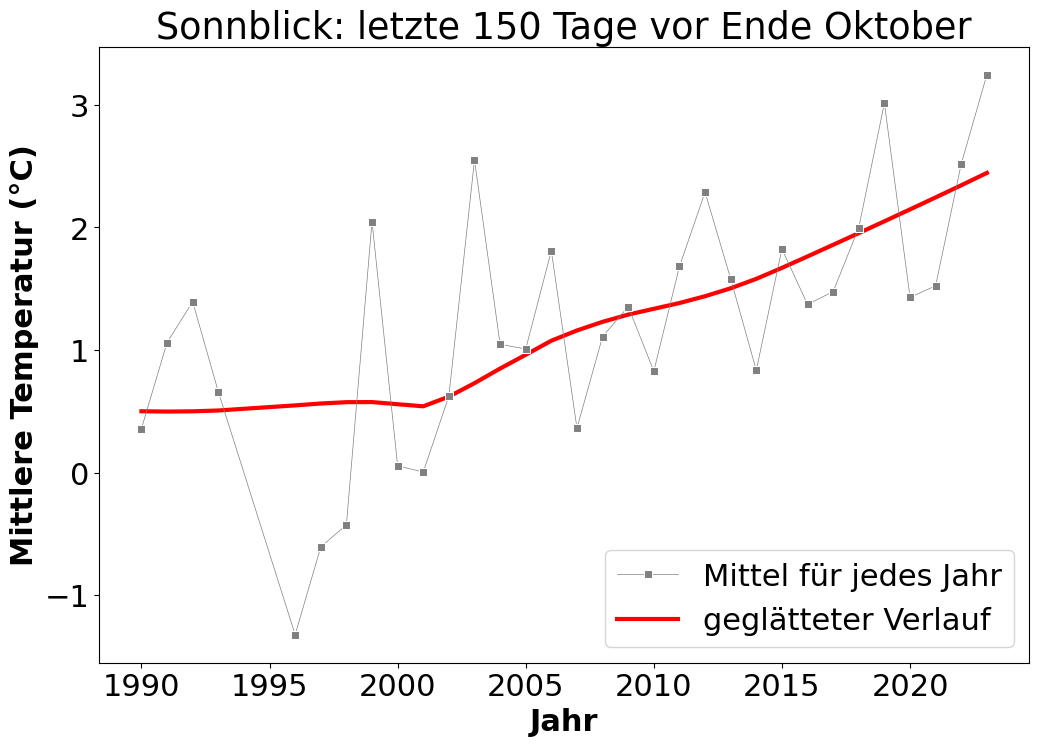

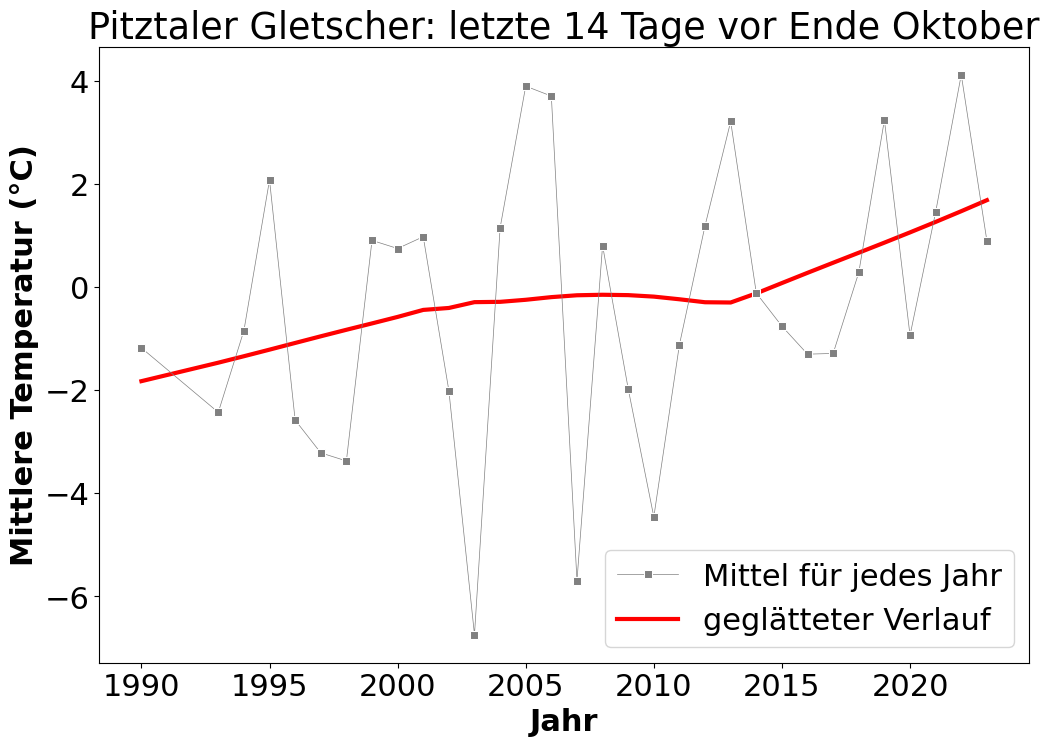

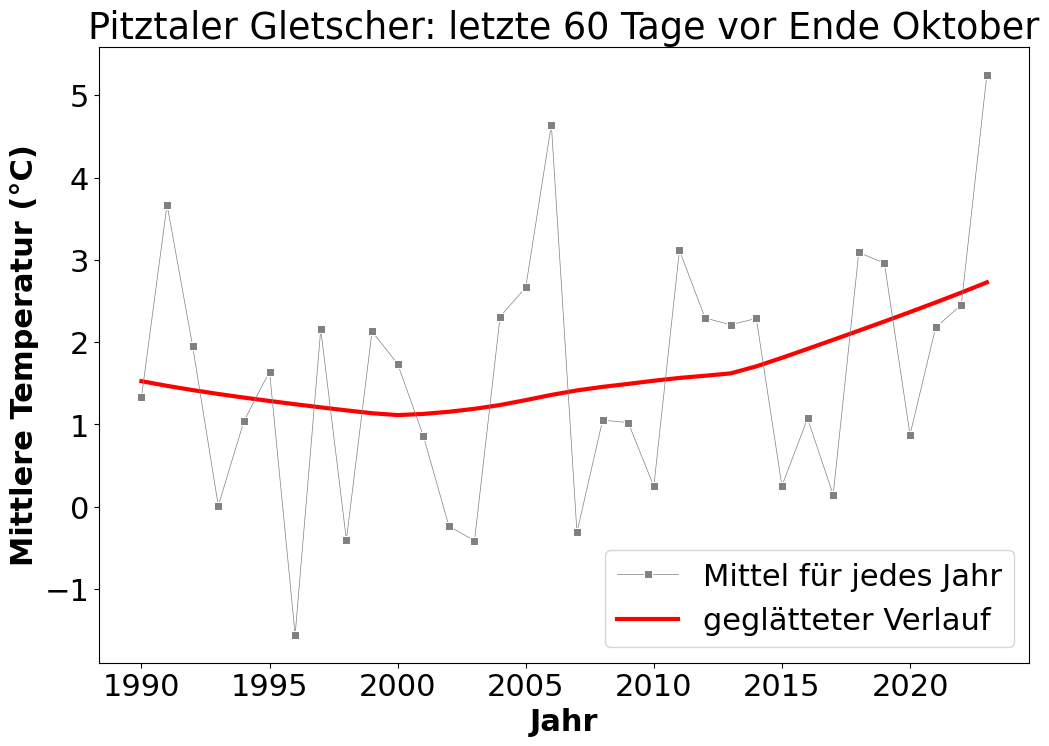

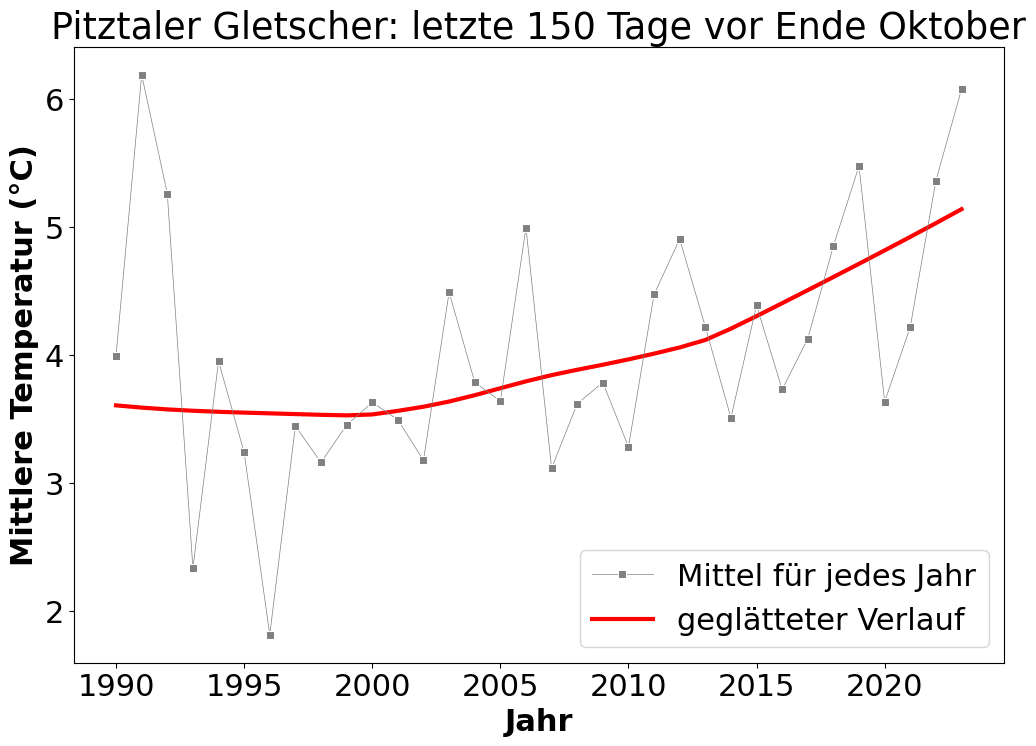

In [297]:
j = 0
for n in name:
    n_sh = name_d_sh[n]
    for days, pd_d in zip([14, 60,150],[pd_station_last2w_oct_mean_d, pd_station_last60d_oct_mean_d, pd_station_last150d_oct_mean_d]):
        pd_station_xx_oct_mean = pd_d[n]
        if n_sh == 'Obergurgl': # only OBergurgl has two stations
            station = 66.0 #pd_station_last2w_oct_mean.station.unique()[0]
            assert len(pd_station_xx_oct_mean.station.unique())==2
        else:
            station = pd_station_xx_oct_mean.station.unique()[0]
            assert len(pd_station_xx_oct_mean.station.unique())==1

        pd_station_xx_oct_mean_st = pd_station_xx_oct_mean.loc[pd_station_xx_oct_mean.station == station]
        pd_station_xx_oct_mean_st['t_roll'] = pd_station_xx_oct_mean_st.rolling(window=10, center=True).mean()['t']
        pd_station_xx_oct_mean_st = pd_station_xx_oct_mean_st.loc[pd_station_xx_oct_mean_st.year>=1990]
        plt.figure(figsize=(12,8))
        plt.rc('font', size=22)

        markers_d = {station:'s'} #, 17300:'o'}
        sns.regplot(data=pd_station_xx_oct_mean_st, x= 'year', y='t', 
                    line_kws={'lw':3},
                    lowess=True,
                       # markers = markers_d, 
                     #style='station',
                    color = 'Red',# linewidth=3,
                       # lw=0.5,
                    #linestyle=':', #dashes={'66.0':'--'},
                        label='geglätteter Verlauf', ci=None, marker='_') #, estimator='None')
        sns.lineplot(data=pd_station_xx_oct_mean_st, x= 'year', y='t', 
                        markers = markers_d, 
                     style='station', color = 'grey',
                        lw=0.5, linestyle=':', #dashes={'66.0':'--'},
                        label='Mittel für jedes Jahr')
        #sns.lineplot(data=pd_station_last2w_oct_mean_st, x= 'year', y='t_roll', 
        #               # markers = markers_d, #style='station',
        #             color = 'red', lw=3, #s= 50, 
        #                label='5-Jahres gleitende Mittel')
        plt.ylabel('Mittlere Temperatur (°C)',fontweight='bold')
        plt.xlabel('Jahr', fontweight='bold')
        handles, labels = plt.gca().get_legend_handles_labels()
        plt.title(f'{n_sh}: letzte {days} Tage vor Ende Oktober')
        plt.legend([handles[0],handles_l],
                   [labels[0], labels[2]], loc='lower right')
        if days==14:
            plt.ylim([plt.gca().get_ylim()[0], plt.gca().get_ylim()[1]])        
        else:
            plt.ylim([plt.gca().get_ylim()[0], plt.gca().get_ylim()[1]])
        plt.savefig(f'{n_sh}_temp_change_last{days}days_beforeendoct_lowess_since1990.png', dpi=300)
        plt.savefig(f'{n_sh}_temp_change_last{days}days_beforeendoct_lowess_since1990.svg', dpi=300)

/tmp/ipykernel_49526/2831195314.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_station_last2w_oct_mean_st66['t_roll'] = pd_station_last2w_oct_mean_st66.rolling(window=10, center=True).mean()['t']


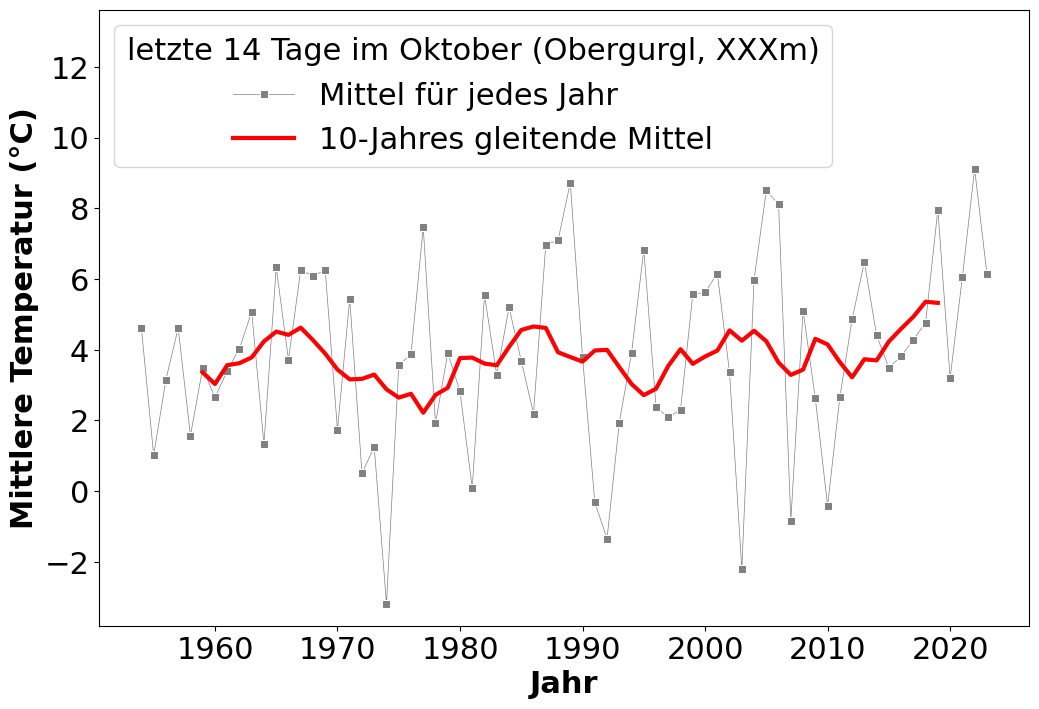

In [206]:
pd_station_last2w_oct_mean = pd_station_last2w_oct_mean_d['19540101_20231101_Obergurgl']

pd_station_last2w_oct_mean_st66 = pd_station_last2w_oct_mean.loc[pd_station_last2w_oct_mean.station == 66.0]
pd_station_last2w_oct_mean_st66['t_roll'] = pd_station_last2w_oct_mean_st66.rolling(window=10, center=True).mean()['t']

plt.figure(figsize=(12,8))
plt.rc('font', size=22)

markers_d = {66.0:'s'} #, 17300:'o'}
sns.lineplot(data=pd_station_last2w_oct_mean_st66, x= 'year', y='t', 
                markers = markers_d, 
             style='station', color = 'grey',
                lw=0.5, linestyle=':', #dashes={'66.0':'--'},
                label='Mittel für jedes Jahr')
sns.lineplot(data=pd_station_last2w_oct_mean_st66, x= 'year', y='t_roll', 
               # markers = markers_d, #style='station',
             color = 'red', lw=3, #s= 50, 
                label='10-Jahres gleitende Mittel')
plt.ylabel('Mittlere Temperatur (°C)',fontweight='bold')
plt.xlabel('Jahr', fontweight='bold')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[0],handles[-1]],
           [labels[0],labels[-1]], title='letzte 14 Tage im Oktober (Obergurgl, XXXm)', loc='upper left')
plt.ylim([plt.gca().get_ylim()[0], plt.gca().get_ylim()[1]*1.4])
plt.savefig('obergurgl_temp_change_last2woct.png')

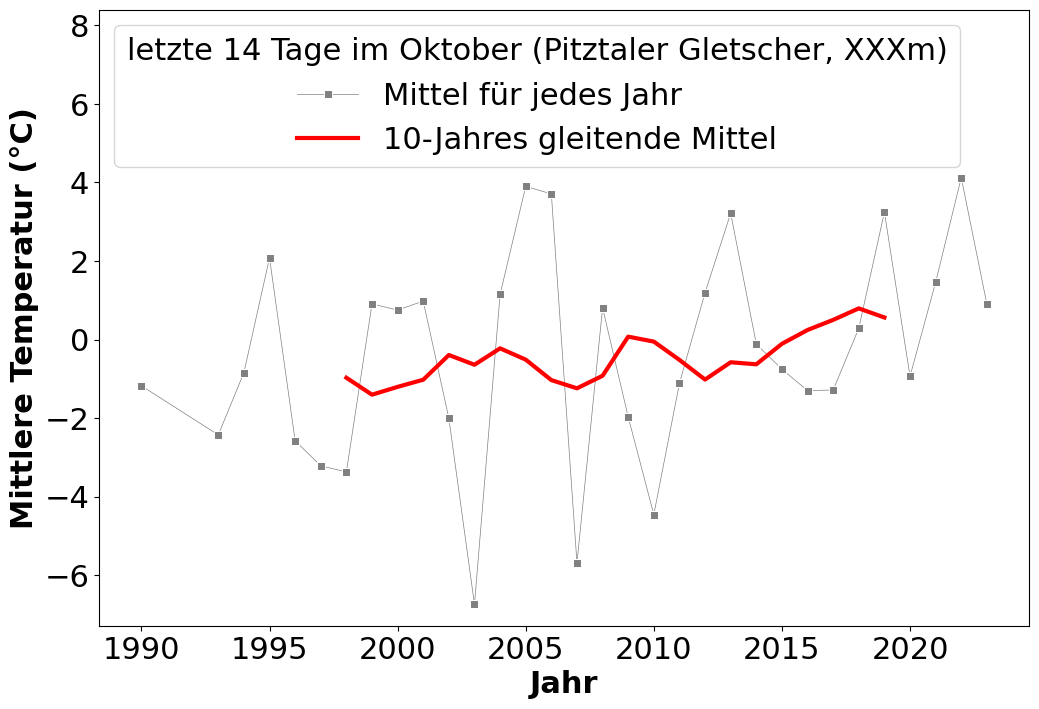

In [254]:

pd_station_last2w_oct_mean = pd_station_last2w_oct_mean_d['19900101_20231101_PitztalerGletscher']
station = pd_station_last2w_oct_mean.station.unique()[0]
assert len(pd_station_last2w_oct_mean.station.unique())==1

pd_station_last2w_oct_mean_st = pd_station_last2w_oct_mean.loc[pd_station_last2w_oct_mean.station == station]
pd_station_last2w_oct_mean_st['t_roll'] = pd_station_last2w_oct_mean_st.rolling(window=10, center=True).mean()['t']

plt.figure(figsize=(12,8))
plt.rc('font', size=22)

markers_d = {station:'s'} #, 17300:'o'}
sns.lineplot(data=pd_station_last2w_oct_mean_st, x= 'year', y='t', 
                markers = markers_d, 
             style='station', color = 'grey',
                lw=0.5, linestyle=':', #dashes={'66.0':'--'},
                label='Mittel für jedes Jahr')
sns.lineplot(data=pd_station_last2w_oct_mean_st, x= 'year', y='t_roll', 
               # markers = markers_d, #style='station',
             color = 'red', lw=3, #s= 50, 
                label='10-Jahres gleitende Mittel')
plt.ylabel('Mittlere Temperatur (°C)',fontweight='bold')
plt.xlabel('Jahr', fontweight='bold')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[0],handles[-1]],
           [labels[0],labels[-1]], title='letzte 14 Tage im Oktober (Pitztaler Gletscher, XXXm)', loc='upper left')
plt.ylim([plt.gca().get_ylim()[0], plt.gca().get_ylim()[1]*1.8])
plt.savefig('PitztalerGletscher_temp_change_last2woct.png')

In [255]:
handles_l = handles[-1]

/tmp/ipykernel_49526/2201820191.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_station_last2w_oct_mean_st['t_roll'] = pd_station_last2w_oct_mean_st.rolling(window=10, center=True).mean()['t']


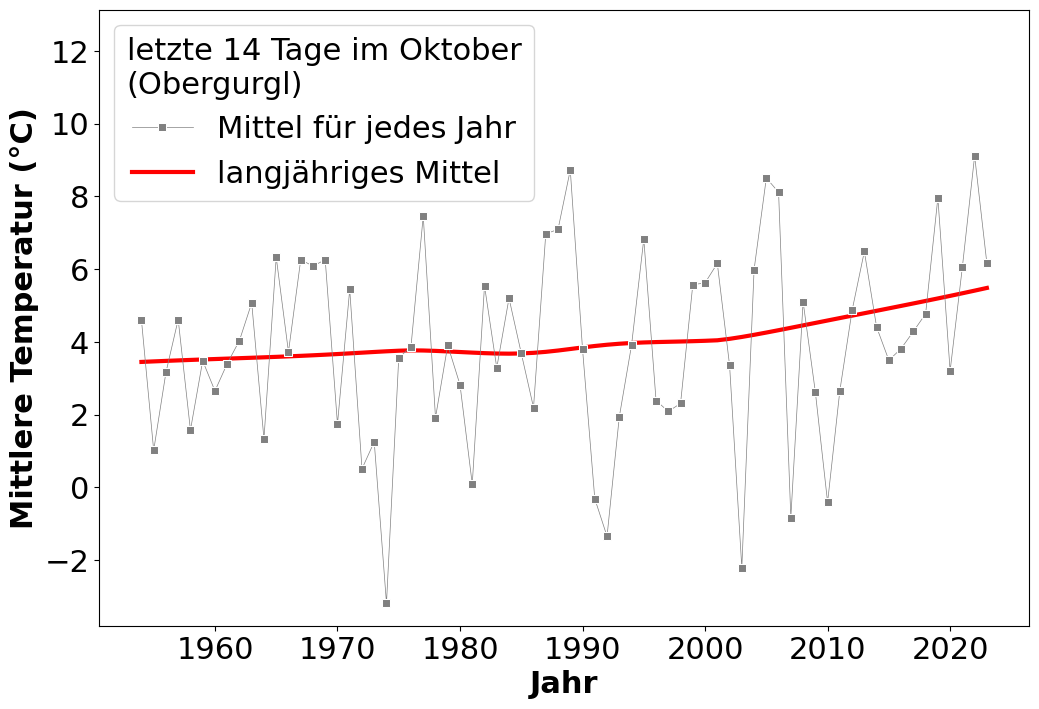

In [268]:
pd_station_last2w_oct_mean = pd_station_last2w_oct_mean_d['19540101_20231101_Obergurgl']

station = 66.0 #pd_station_last2w_oct_mean.station.unique()[0]
assert len(pd_station_last2w_oct_mean.station.unique())==2

pd_station_last2w_oct_mean_st = pd_station_last2w_oct_mean.loc[pd_station_last2w_oct_mean.station == station]
pd_station_last2w_oct_mean_st['t_roll'] = pd_station_last2w_oct_mean_st.rolling(window=10, center=True).mean()['t']

plt.figure(figsize=(12,8))
plt.rc('font', size=22)

markers_d = {station:'s'} #, 17300:'o'}
sns.regplot(data=pd_station_last2w_oct_mean_st, x= 'year', y='t', 
            line_kws={'lw':3},
            lowess=True,
               # markers = markers_d, 
             #style='station',
            color = 'Red',# linewidth=3,
               # lw=0.5,
            #linestyle=':', #dashes={'66.0':'--'},
                label='langjähriges Mittel', ci=None, marker='_') #, estimator='None')
sns.lineplot(data=pd_station_last2w_oct_mean_st, x= 'year', y='t', 
                markers = markers_d, 
             style='station', color = 'grey',
                lw=0.5, linestyle=':', #dashes={'66.0':'--'},
                label='Mittel für jedes Jahr')
#sns.lineplot(data=pd_station_last2w_oct_mean_st, x= 'year', y='t_roll', 
#               # markers = markers_d, #style='station',
#             color = 'red', lw=3, #s= 50, 
#                label='5-Jahres gleitende Mittel')
plt.ylabel('Mittlere Temperatur (°C)',fontweight='bold')
plt.xlabel('Jahr', fontweight='bold')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[0],handles_l],
           [labels[0], labels[2]], title='letzte 14 Tage im Oktober\n(Obergurgl)', loc='upper left')
plt.ylim([plt.gca().get_ylim()[0], plt.gca().get_ylim()[1]*1.35])
plt.savefig('Obergurgl_temp_change_last2woct_lowess.png')

/tmp/ipykernel_49526/3151178537.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_station_last2w_oct_mean_st['t_roll'] = pd_station_last2w_oct_mean_st.rolling(window=10, center=True).mean()['t']


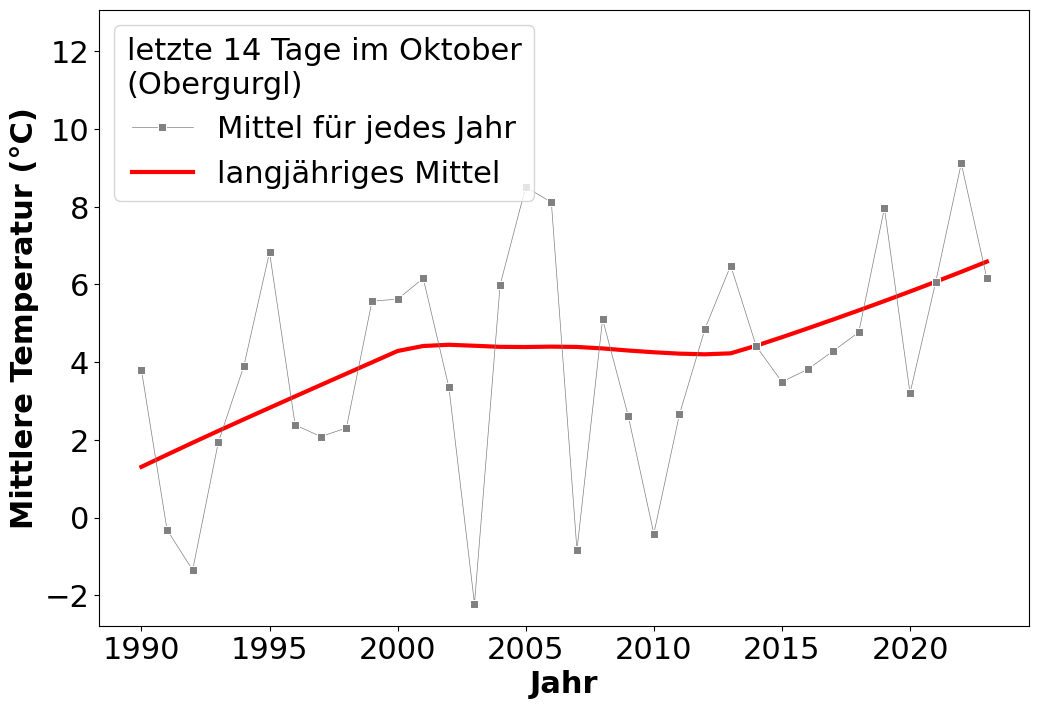

In [269]:
pd_station_last2w_oct_mean = pd_station_last2w_oct_mean_d['19540101_20231101_Obergurgl']

station = 66.0 #pd_station_last2w_oct_mean.station.unique()[0]
assert len(pd_station_last2w_oct_mean.station.unique())==2

pd_station_last2w_oct_mean_st = pd_station_last2w_oct_mean.loc[pd_station_last2w_oct_mean.station == station]
pd_station_last2w_oct_mean_st['t_roll'] = pd_station_last2w_oct_mean_st.rolling(window=10, center=True).mean()['t']
pd_station_last2w_oct_mean_st = pd_station_last2w_oct_mean_st.loc[pd_station_last2w_oct_mean_st.year>=1990]
plt.figure(figsize=(12,8))
plt.rc('font', size=22)

markers_d = {station:'s'} #, 17300:'o'}
sns.regplot(data=pd_station_last2w_oct_mean_st, x= 'year', y='t', 
            line_kws={'lw':3},
            lowess=True,
               # markers = markers_d, 
             #style='station',
            color = 'Red',# linewidth=3,
               # lw=0.5,
            #linestyle=':', #dashes={'66.0':'--'},
                label='langjähriges Mittel', ci=None, marker='_') #, estimator='None')
sns.lineplot(data=pd_station_last2w_oct_mean_st, x= 'year', y='t', 
                markers = markers_d, 
             style='station', color = 'grey',
                lw=0.5, linestyle=':', #dashes={'66.0':'--'},
                label='Mittel für jedes Jahr')
#sns.lineplot(data=pd_station_last2w_oct_mean_st, x= 'year', y='t_roll', 
#               # markers = markers_d, #style='station',
#             color = 'red', lw=3, #s= 50, 
#                label='5-Jahres gleitende Mittel')
plt.ylabel('Mittlere Temperatur (°C)',fontweight='bold')
plt.xlabel('Jahr', fontweight='bold')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[0],handles_l],
           [labels[0], labels[2]], title='letzte 14 Tage im Oktober\n(Obergurgl)', loc='upper left')
plt.ylim([plt.gca().get_ylim()[0], plt.gca().get_ylim()[1]*1.35])
plt.savefig('Obergurgl_temp_change_last2woct_lowess_since1990.png')

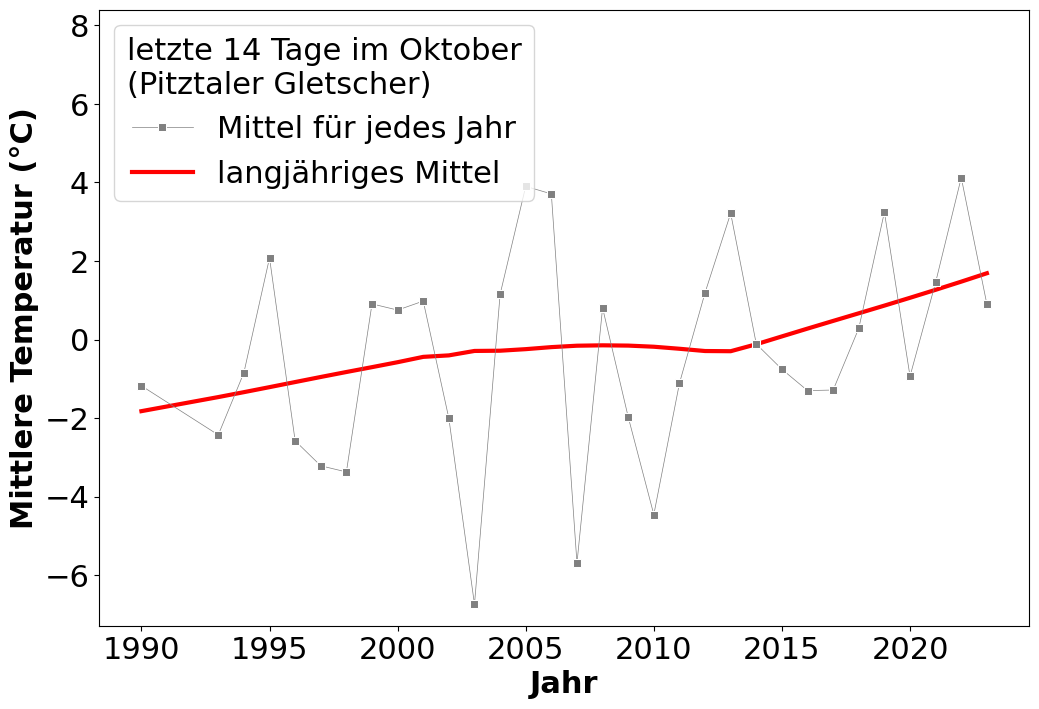

In [262]:
pd_station_last2w_oct_mean = pd_station_last2w_oct_mean_d['19900101_20231101_PitztalerGletscher']

station = pd_station_last2w_oct_mean.station.unique()[0]
assert len(pd_station_last2w_oct_mean.station.unique())==1

pd_station_last2w_oct_mean_st = pd_station_last2w_oct_mean.loc[pd_station_last2w_oct_mean.station == station]
pd_station_last2w_oct_mean_st['t_roll'] = pd_station_last2w_oct_mean_st.rolling(window=10, center=True).mean()['t']

plt.figure(figsize=(12,8))
plt.rc('font', size=22)

markers_d = {station:'s'} #, 17300:'o'}
sns.regplot(data=pd_station_last2w_oct_mean_st, x= 'year', y='t', 
            line_kws={'lw':3},
            lowess=True,
               # markers = markers_d, 
             #style='station',
            color = 'Red',# linewidth=3,
               # lw=0.5,
            #linestyle=':', #dashes={'66.0':'--'},
                label='langjähriges Mittel', ci=None, marker='_') #, estimator='None')
sns.lineplot(data=pd_station_last2w_oct_mean_st, x= 'year', y='t', 
                markers = markers_d, 
             style='station', color = 'grey',
                lw=0.5, linestyle=':', #dashes={'66.0':'--'},
                label='Mittel für jedes Jahr')
#sns.lineplot(data=pd_station_last2w_oct_mean_st, x= 'year', y='t_roll', 
#               # markers = markers_d, #style='station',
#             color = 'red', lw=3, #s= 50, 
#                label='5-Jahres gleitende Mittel')
plt.ylabel('Mittlere Temperatur (°C)',fontweight='bold')
plt.xlabel('Jahr', fontweight='bold')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[0],handles_l],
           [labels[0], labels[2]], title='letzte 14 Tage im Oktober\n(Pitztaler Gletscher)', loc='upper left')
plt.ylim([plt.gca().get_ylim()[0], plt.gca().get_ylim()[1]*1.8])
plt.savefig('PitztalerGletscher_temp_change_last2woct_lowess.png')

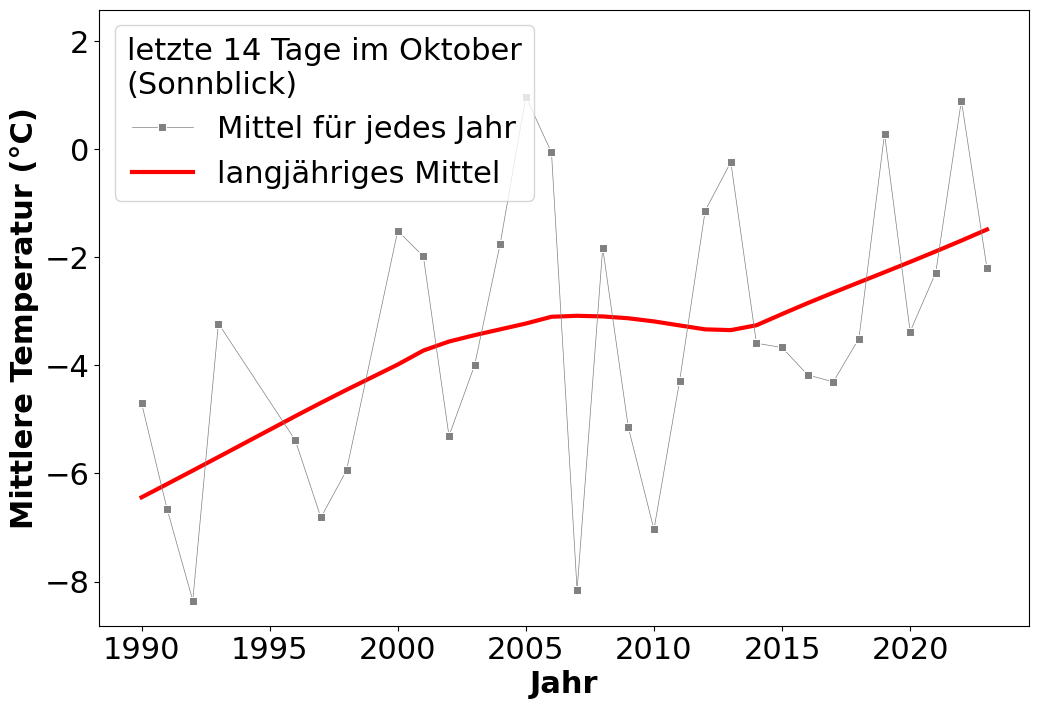

In [261]:
pd_station_last2w_oct_mean = pd_station_last2w_oct_mean_d['19900101_20231101_Sonnblick']
station = pd_station_last2w_oct_mean.station.unique()[0]
assert len(pd_station_last2w_oct_mean.station.unique())==1

pd_station_last2w_oct_mean_st = pd_station_last2w_oct_mean.loc[pd_station_last2w_oct_mean.station == station]
pd_station_last2w_oct_mean_st['t_roll'] = pd_station_last2w_oct_mean_st.rolling(window=10, center=True).mean()['t']

plt.figure(figsize=(12,8))
plt.rc('font', size=22)

markers_d = {station:'s'} #, 17300:'o'}
sns.regplot(data=pd_station_last2w_oct_mean_st, x= 'year', y='t', 
            line_kws={'lw':3},
            lowess=True,
               # markers = markers_d, 
             #style='station',
            color = 'Red',# linewidth=3,
               # lw=0.5,
            #linestyle=':', #dashes={'66.0':'--'},
                label='langjähriges Mittel', ci=None, marker='_') #, estimator='None')
sns.lineplot(data=pd_station_last2w_oct_mean_st, x= 'year', y='t', 
                markers = markers_d, 
             style='station', color = 'grey',
                lw=0.5, linestyle=':', #dashes={'66.0':'--'},
                label='Mittel für jedes Jahr')
#sns.lineplot(data=pd_station_last2w_oct_mean_st, x= 'year', y='t_roll', 
#               # markers = markers_d, #style='station',
#             color = 'red', lw=3, #s= 50, 
#                label='5-Jahres gleitende Mittel')
plt.ylabel('Mittlere Temperatur (°C)',fontweight='bold')
plt.xlabel('Jahr', fontweight='bold')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[0],handles_l],
           [labels[0], labels[2]], title='letzte 14 Tage im Oktober\n(Sonnblick)', loc='upper left')
plt.ylim([plt.gca().get_ylim()[0], plt.gca().get_ylim()[1]*1.8])
plt.savefig('Sonnblick_temp_change_last2woct_lowess.png')

In [257]:
sns.regplot?

Signature:
sns.regplot(
    data=None,
    *,
    x=None,
    y=None,
    x_estimator=None,
    x_bins=None,
    x_ci='ci',
    scatter=True,
    fit_reg=True,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    order=1,
    logistic=False,
    lowess=False,
    robust=False,
    logx=False,
    x_partial=None,
    y_partial=None,
    truncate=True,
    dropna=True,
    x_jitter=None,
    y_jitter=None,
    label=None,
    color=None,
    marker='o',
    scatter_kws=None,
    line_kws=None,
    ax=None,
)
Docstring:
Plot data and a linear regression model fit.

There are a number of mutually exclusive options for estimating the
regression model. See the :ref:`tutorial <regression_tutorial>` for more
information.    

Parameters
----------
x, y: string, series, or vector array
    Input variables. If strings, these should correspond with column names
    in ``data``. When pandas objects are used, axes will be labeled with
    the series name.
data : DataFrame
    Tidy ("long-

In [237]:
sns.regplot?

Signature:
sns.regplot(
    data=None,
    *,
    x=None,
    y=None,
    x_estimator=None,
    x_bins=None,
    x_ci='ci',
    scatter=True,
    fit_reg=True,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    order=1,
    logistic=False,
    lowess=False,
    robust=False,
    logx=False,
    x_partial=None,
    y_partial=None,
    truncate=True,
    dropna=True,
    x_jitter=None,
    y_jitter=None,
    label=None,
    color=None,
    marker='o',
    scatter_kws=None,
    line_kws=None,
    ax=None,
)
Docstring:
Plot data and a linear regression model fit.

There are a number of mutually exclusive options for estimating the
regression model. See the :ref:`tutorial <regression_tutorial>` for more
information.    

Parameters
----------
x, y: string, series, or vector array
    Input variables. If strings, these should correspond with column names
    in ``data``. When pandas objects are used, axes will be labeled with
    the series name.
data : DataFrame
    Tidy ("long-